# Gold price prediction

In [21]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Processing

In [14]:
gold_df = pd.read_csv(r'C:\Users\satad\Documents\Data sets\Gold price prediction\archive\Gold price prediction.csv')
gold_df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [15]:
#shape of the dataset
gold_df.shape

(2290, 6)

In [17]:
#data type information
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
#finding null values
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
#statistical measures of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
correlation = gold_df.corr()

<AxesSubplot:>

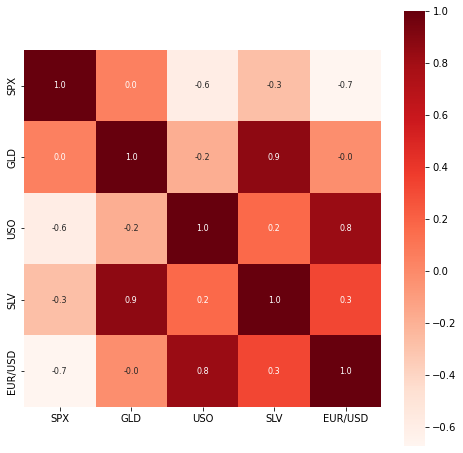

In [44]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [34]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\satad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

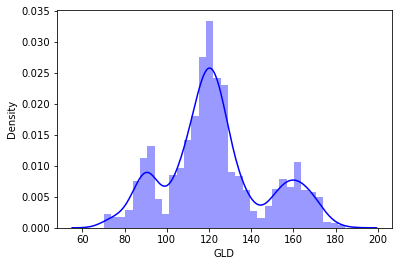

In [48]:
#cheking the distribution of the gold price
sns.distplot(gold_df['GLD'], color='Blue')

Splitting the Feature and Target

In [49]:
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [50]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [51]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=42)

Model training: Random Forest Regressor

In [73]:
regressor = RandomForestRegressor(n_estimators=100)

In [74]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [75]:
#prediction on the test data
test_data_prediction = regressor.predict(X_test)

In [76]:
print(test_data_prediction)

[122.52739929 130.89600216 127.66739939  96.60719716 118.57030075
 114.49109896 124.79520153 117.81269948 108.07400106  98.17349973
  95.51739927 167.75269872 149.27590037 116.25010037 170.72060093
  85.14389999 123.05449883 109.11159723 113.19420041 131.51480353
 124.28079897 113.40880079 116.108301   108.87129968 108.68300157
 125.75239916 118.63359973 112.30599916 113.28520167 125.64669953
 146.27440201  89.46450005 167.68809966 113.9281995  108.32250065
 120.18450098 141.15919911 161.16210136 173.96239832 153.0164014
 118.86510083 113.52160084 121.44219916 113.65609917 122.14403808
 108.10450099  88.403099   114.36249911 129.79140173 117.73960079
 103.35620063 129.79350186 107.27849843 160.43650379 131.89790025
 118.51389986 147.18130028 134.52170293  95.87640101 124.75730165
 115.00839859  86.08420078 104.28399912 114.02380065  84.32449926
 122.27809999 116.47229936 113.78020196 164.33080288  92.39620007
  80.18060115 161.12409996 158.33080239 106.71280034 148.68320128
 109.551697

In [77]:
#R squarred error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squarred error:", error_score)

R squarred error: 0.990412567325633


In [78]:
Y_test=list(Y_test)

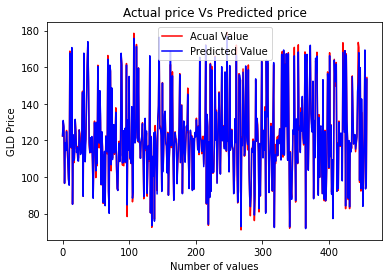

In [79]:
#plotting the difference between actual and predicted value
plt.plot(Y_test, color='Red', label ='Acual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual price Vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()